The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'/Users/gangashaji/Downloads/car_age_price.csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.Year.unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

No missing values

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb278d1840>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb278d1d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb278d15a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb278d22c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb278d2560>],
 'means': []}

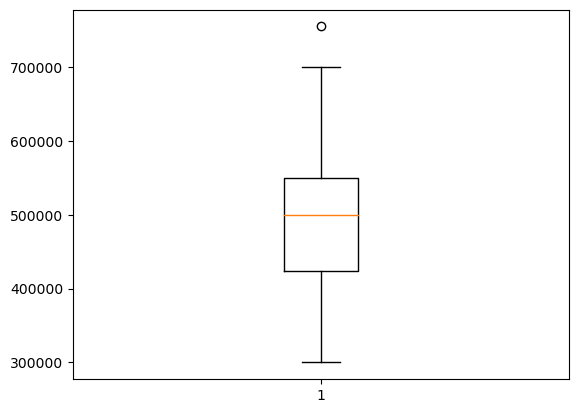

In [8]:
plt.boxplot(data.Price)

In [9]:
Q1=np.percentile(data.Price,25)
Q1

423750.0

In [10]:
Q2=np.percentile(data.Price,50)
Q2

500000.0

In [11]:
Q3=np.percentile(data.Price,75)
Q3

550000.0

In [12]:
IQR=Q3-Q1
IQR

126250.0

In [13]:
lower_limit=Q1-1.5*IQR
lower_limit

234375.0

In [14]:
upper_limit=Q3+1.5*IQR
upper_limit

739375.0

In [15]:
outlier=[]
for i in data.Price:
    if i>upper_limit:
        outlier.append(i)

In [16]:
outlier

[755000]

In [17]:
ind=data.Price>upper_limit
data.loc[ind].index

Int64Index([1], dtype='int64')

#outlier corresponds to year 2019.Need not drop the outlier as it is not much different from the upper limit

In [18]:
corr_matrix=data.corr()

<Axes: >

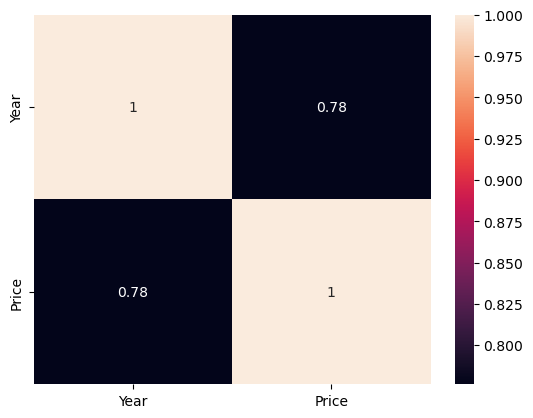

In [19]:
sns.heatmap(corr_matrix,annot=True)

In [20]:
Age=2023-data.Year #difference between current year and data.Year

In [21]:
Age

0      5
1      4
2      4
3      5
4      5
      ..
107    7
108    9
109    8
110    7
111    8
Name: Year, Length: 112, dtype: int64

In [22]:
type(Age)

pandas.core.series.Series

In [23]:
Age=pd.DataFrame(Age)

In [24]:
Age

,Year
0,5
1,4
2,4
3,5
4,5
...,...
107,7
108,9
109,8
110,7


In [25]:
data=data.drop('Year',axis=1)

In [26]:
data=pd.concat([Age,data],axis=1)

In [27]:
data.columns=['Age','Price']
data

,Age,Price
0,5,465000
1,4,755000
2,4,700000
3,5,465000
4,5,465000
...,...,...
107,7,375000
108,9,300000
109,8,425000
110,7,420000


Text(0, 0.5, 'Price')

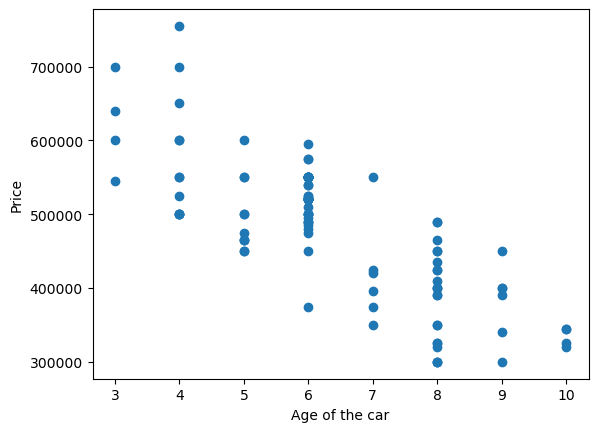

In [28]:
plt.scatter(data.Age,data.Price)
plt.xlabel('Age of the car')
plt.ylabel('Price')

In [29]:
x=data.drop('Price',axis=1)

In [30]:
type(x)

pandas.core.frame.DataFrame

In [31]:
y=data.Price

In [32]:
type(y)

pandas.core.series.Series

In [33]:
from sklearn.model_selection import train_test_split #to split training and testing data

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100000) 


In [35]:
y_test

97     640000
0      465000
77     325000
2      700000
80     390000
1      755000
98     700000
84     325000
25     550000
89     520000
79     400000
67     400000
21     500000
106    300000
96     520000
9      575000
8      509999
48     396000
90     520000
40     525000
27     550000
75     490000
15     500000
Name: Price, dtype: int64

In [36]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
model=lin_regressor.fit(x_train,y_train)

In [37]:
predictions=model.predict(x_test)

In [38]:
predictions

array([610975.97966963, 534244.841169  , 419148.13341804, 572610.41041931,
       419148.13341804, 572610.41041931, 610975.97966963, 419148.13341804,
       495879.27191868, 495879.27191868, 419148.13341804, 419148.13341804,
       572610.41041931, 419148.13341804, 495879.27191868, 495879.27191868,
       495879.27191868, 457513.70266836, 495879.27191868, 572610.41041931,
       495879.27191868, 495879.27191868, 495879.27191868])

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

MSE= 5304392148.422358
R squared value= 0.6217370269234941


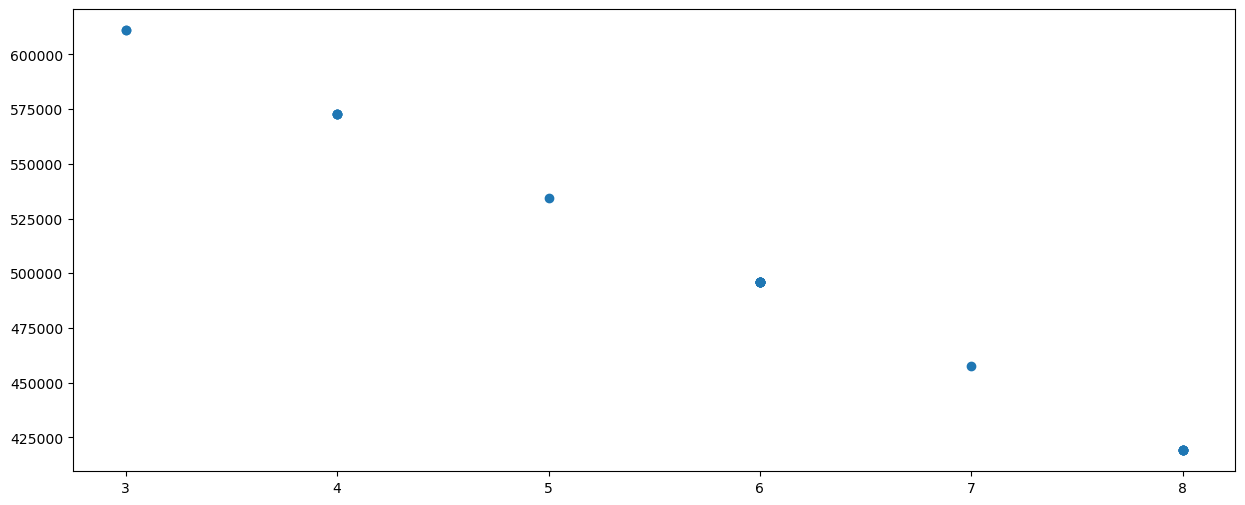

In [40]:
plt.figure(figsize=[15,6])
plt.scatter(x_test,predictions)

In [41]:
#To predict the price of 2022 model second hand car
a=[1] #For a 2022 model car,age of car will be one year
a=pd.DataFrame(a)
pr=model.predict(a)

/Users/gangashaji/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
print('The price of 2022 model second hand car is ',pr)

The price of 2022 model second hand car is  [687707.11817027]


Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasso=Lasso(alpha=0.3)

In [45]:
model1=lasso.fit(x_train,y_train)

In [46]:
predictions1=model.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=',mean_squared_error(y_test,predictions1))
print('R squared value=',r2_score(y_test,predictions1))

MSE= 5304392148.422358
R squared value= 0.6217370269234941


In [48]:
pr1=model1.predict(a)

/Users/gangashaji/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [49]:
print('The price of 2022 model second hand car is ',pr1)

The price of 2022 model second hand car is  [687706.4866191]


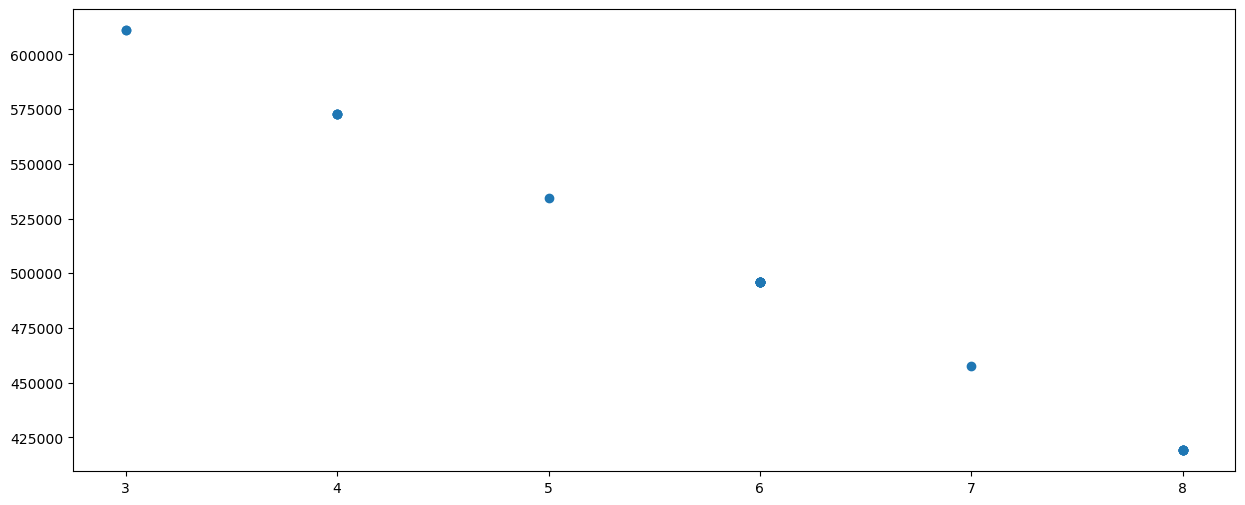

In [50]:
plt.figure(figsize=[15,6])
plt.scatter(x_test,predictions1)

In [51]:
print("Model Score: ", lasso.score(x_test, y_test))

Model Score:  0.6217359411353427


The linear regression model and lasso regression model has same performance as MSE and R-squared values are same